In [ ]:
#
#This notebook is meant to run the models for evaluations and make visualizations of the observed scores (fitness, rmse and time)
#

In [12]:
import open3d as o3d
import numpy as np
import time
import copy
from functions import rmse, fast_global_registration, ransac_global_registration, test_multiple_objects, compare_ransac_vs_fgr
import os

In [ ]:
#collect dataset for registration among simple models, with outliers
folder_path = "dataset/test_x"
sources = []
validation_path = "dataset/test_y"
validation = []
i = 1
#define how many samples to test on
N = 100

for file_name in os.listdir(folder_path):
    while i < N:
        i += 1
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            sources.append(o3d.io.read_point_cloud(file_path))

i = 1

#also collect pointclouds made specifically for validation
for file_name in os.listdir(validation_path):
    while i < N:
        i += 1
        file_path = os.path.join(validation_path, file_name)
        if os.path.isfile(file_path):
            validation.append(o3d.io.read_point_cloud(file_path))

targets = [o3d.io.read_triangle_mesh("./objects/untitled.ply")]

In [ ]:
#perform the registration using ransac
transforms_ransac, scores_ransac = test_multiple_objects(sources, targets, ransac_global_registration, validation, voxel_size=0.1, distance_threshold=0.5)

In [ ]:
#perform the registration using fgr
transforms_fgr, scores_fgr = test_multiple_objects(sources, targets, fast_global_registration, validation, voxel_size=0.1, distance_threshold=0.5)

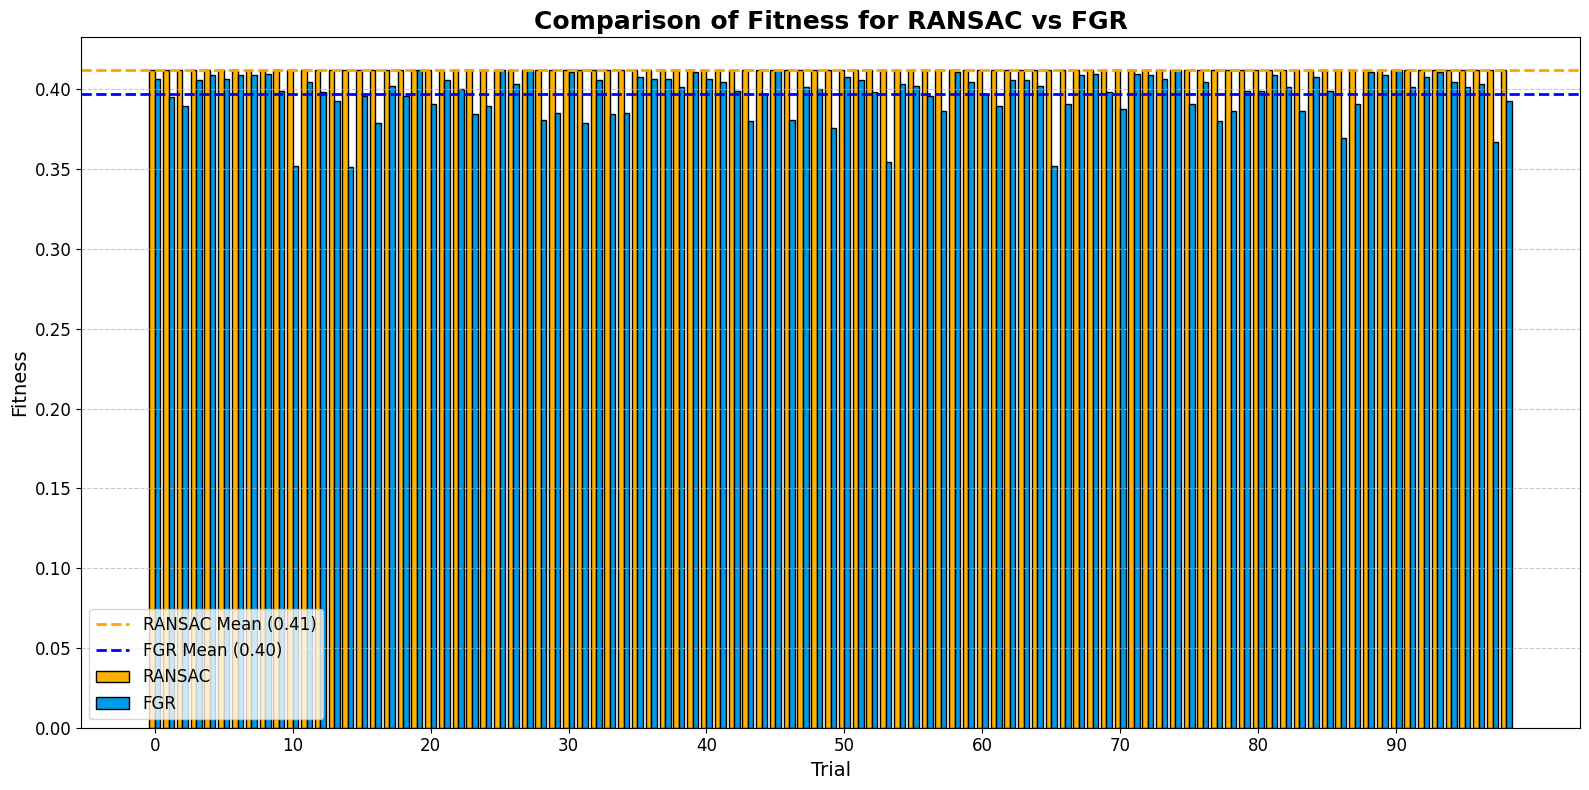

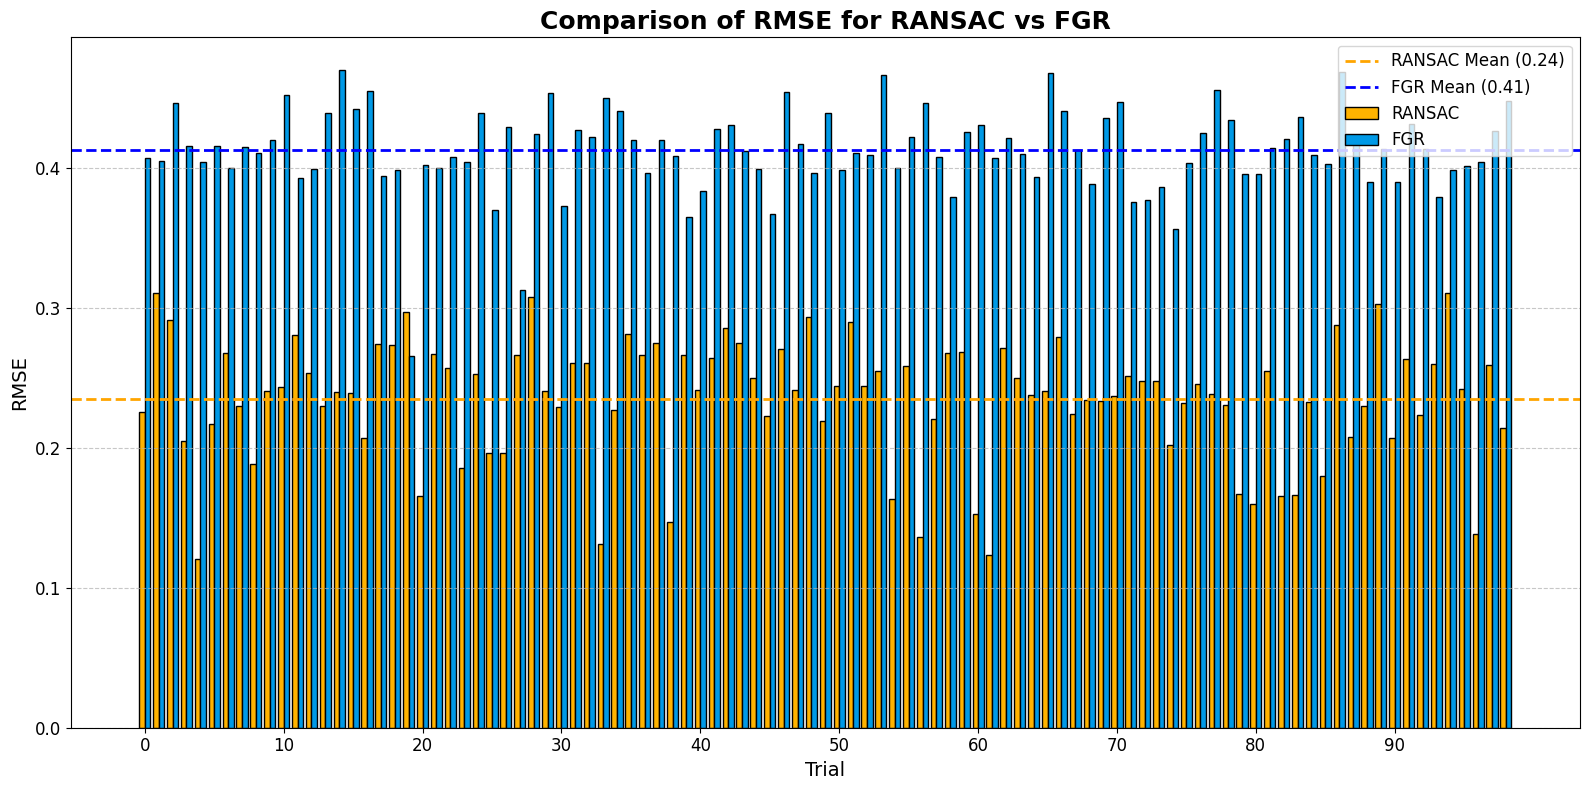

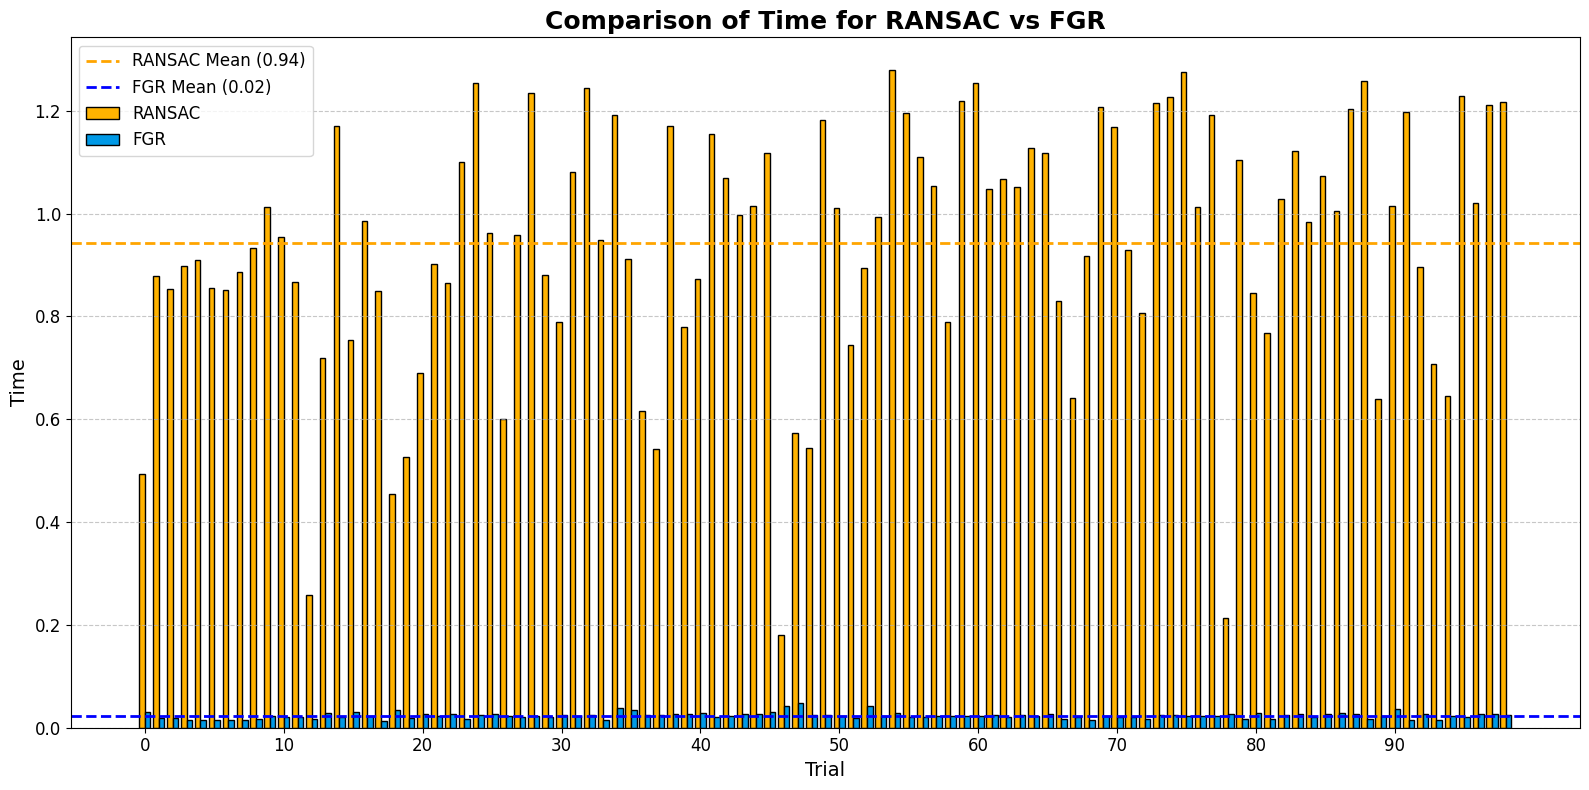

In [ ]:
#plot the fitness, rmse and computation time
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="Fitness")
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="RMSE")
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="Time")

### High resolution, good alignment test

In [24]:
from functions import rmse, test_high_res

In [ ]:
#prepare dataset for high resolution case

#define how many random samples to test on
N = 100

#use models from Open3D library
demo_pcd = o3d.data.DemoICPPointClouds()

#load source and target point clouds
source_pcd = o3d.io.read_point_cloud(demo_pcd.paths[0])
target_pcd = o3d.io.read_point_cloud(demo_pcd.paths[0])

#move pointclouds to origin
source_pcd.translate(-source_pcd.get_center())
target_pcd.translate(-target_pcd.get_center())

#randomize rotations to be tested = number of experiments
thetas = np.random.uniform(low=-np.pi, high=np.pi, size=N)

In [ ]:
#perform the registration using ransac
ransac = ransac_global_registration

transformations_ransac, scores_ransac = test_high_res(source_pcd, thetas, ransac)

In [ ]:
#perform the registration using fgr
fgr = fast_global_registration

transformations_fgr, scores_fgr = test_high_res(source_pcd, thetas, fgr)

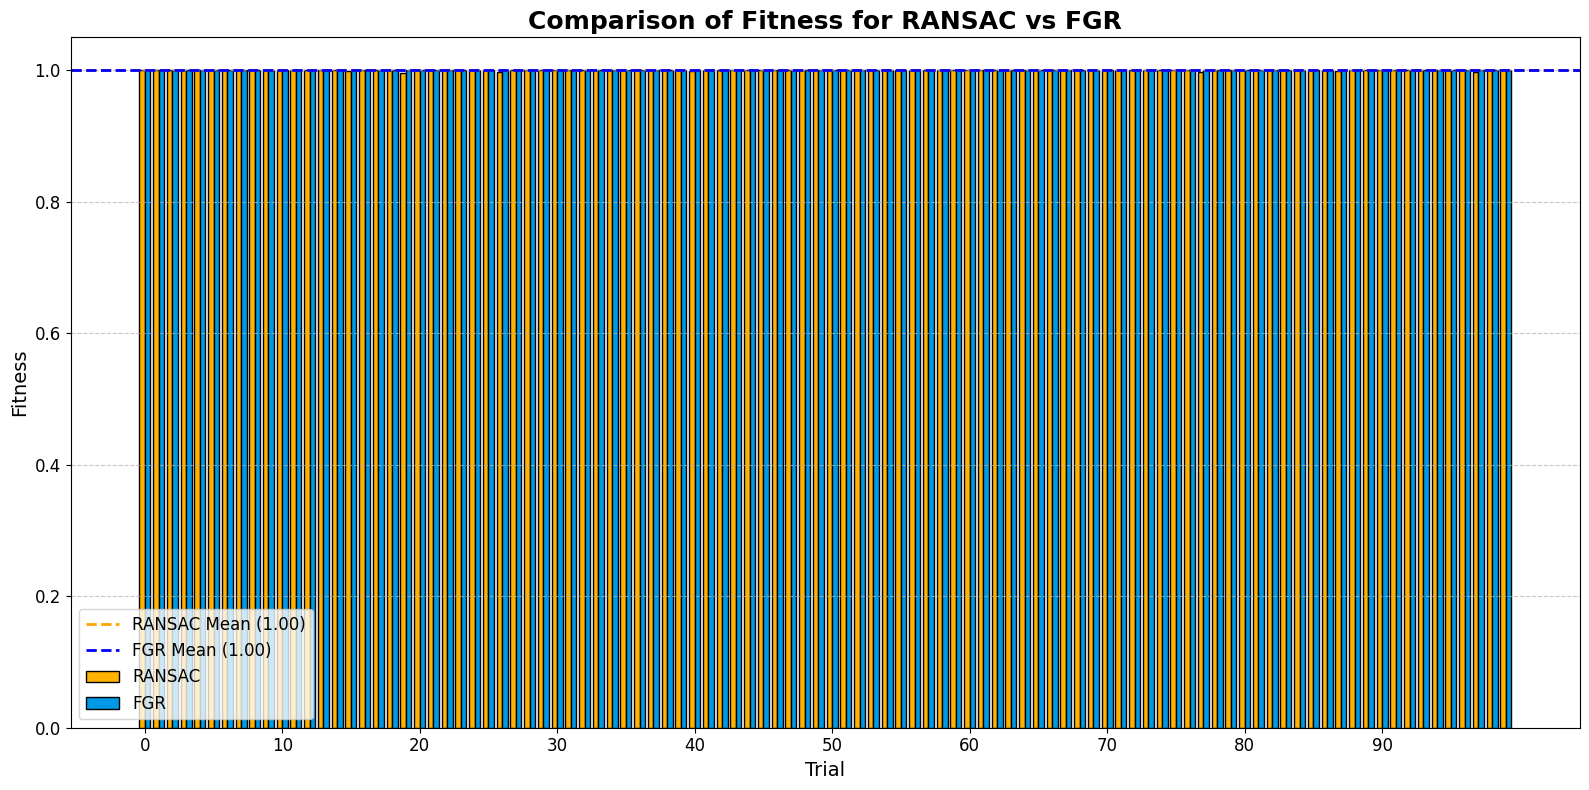

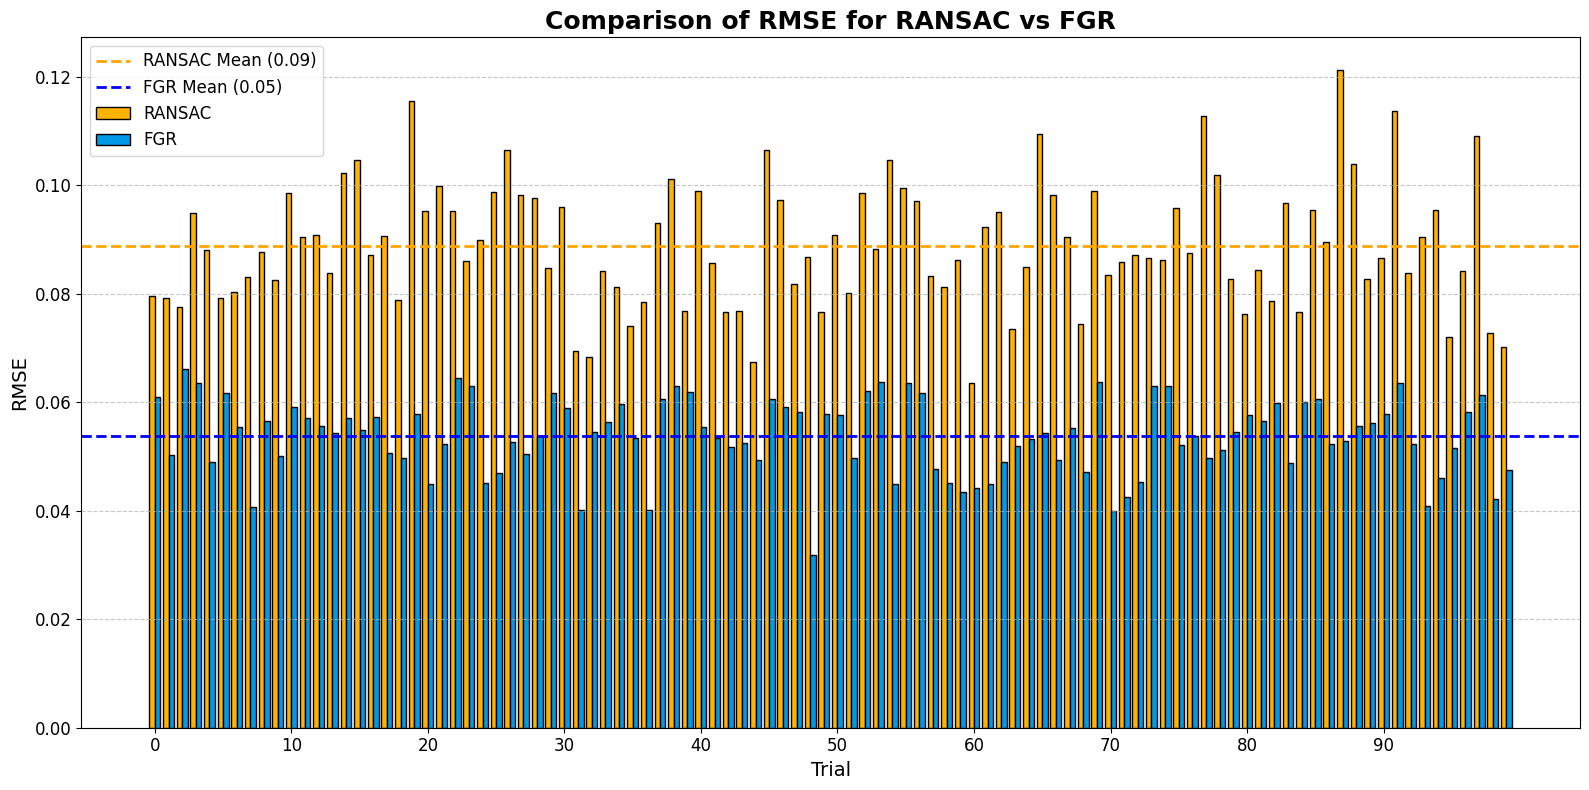

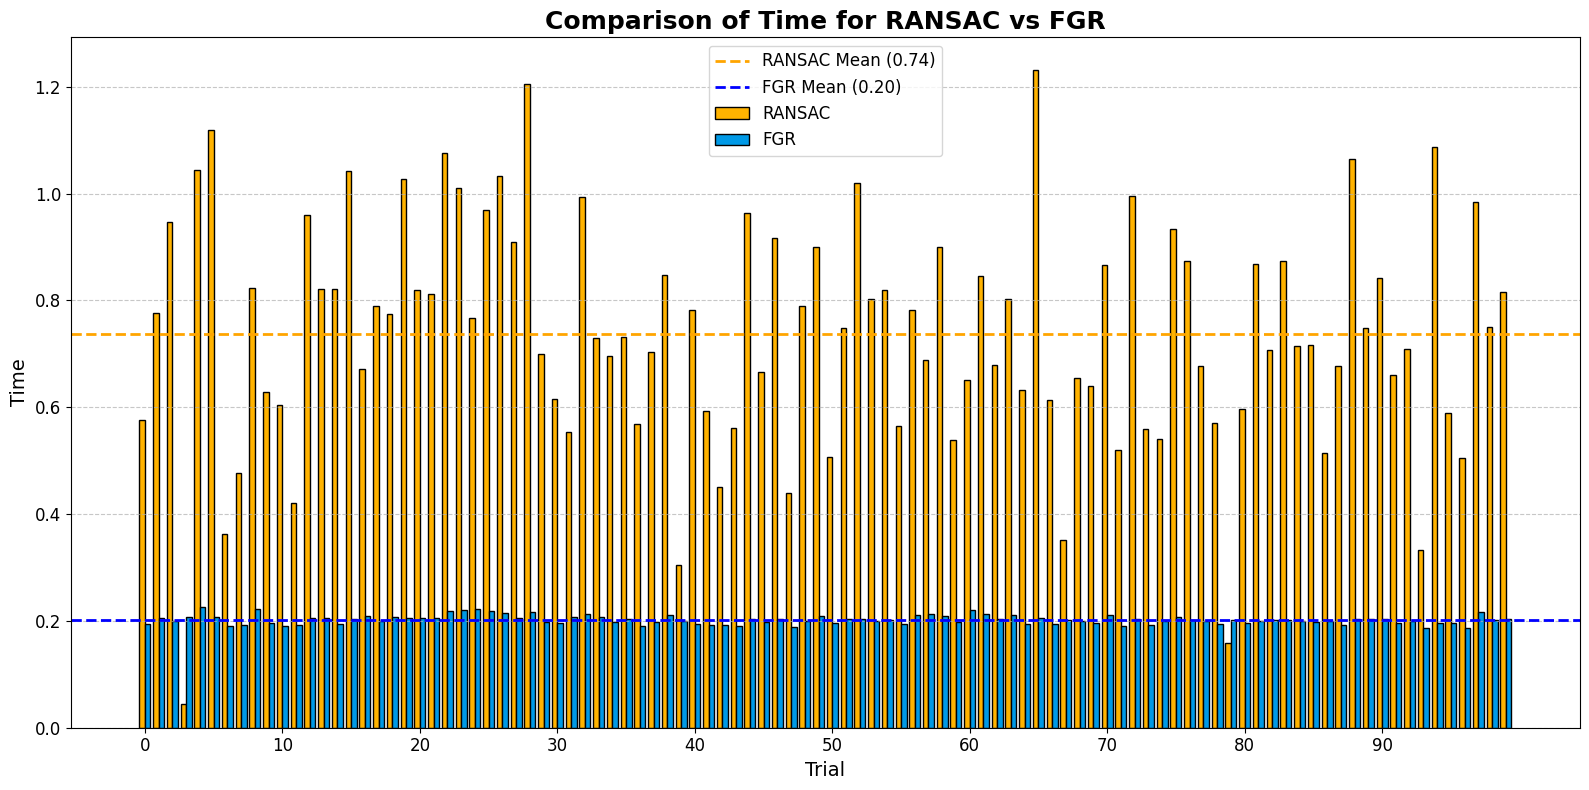

In [ ]:
#plot the fitness, rmse and computation time
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="Fitness")
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="RMSE")
compare_ransac_vs_fgr(scores_ransac, scores_fgr, metric="Time")

In [ ]:
#I also implemented additional local registration, but then decided not to use it in report
'''
result_icp = ransac_global_registration(source_pcd, target_pcd, icp=True)
source_icp = copy.deepcopy(source_pcd)
source_icp.transform(result_icp.transformation)

print(f"Fitness: {result_icp.fitness}, RMSE: {rmse(source_icp, target_pcd)}")
'''

'\nresult_icp = ransac_global_registration(source_pcd, target_pcd, icp=True)\nsource_icp = copy.deepcopy(source_pcd)\nsource_icp.transform(result_icp.transformation)\n\nprint(f"Fitness: {result_icp.fitness}, RMSE: {rmse(source_icp, target_pcd)}")\n'